In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Import the database
raw_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(raw_df.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

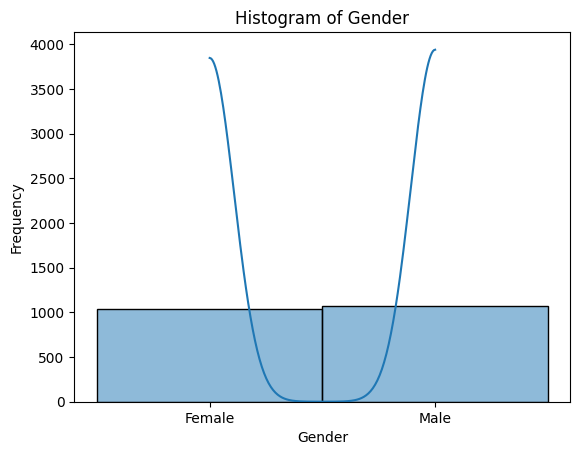

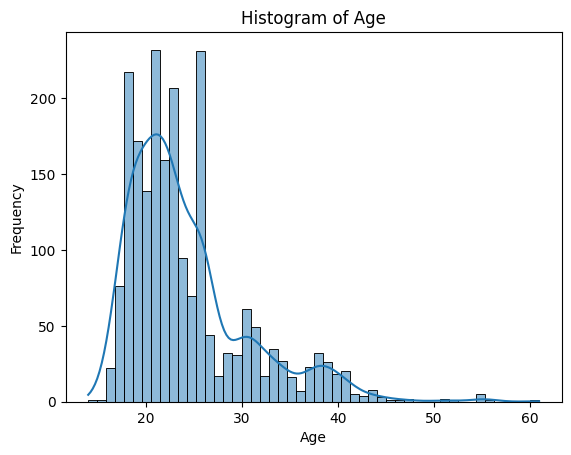

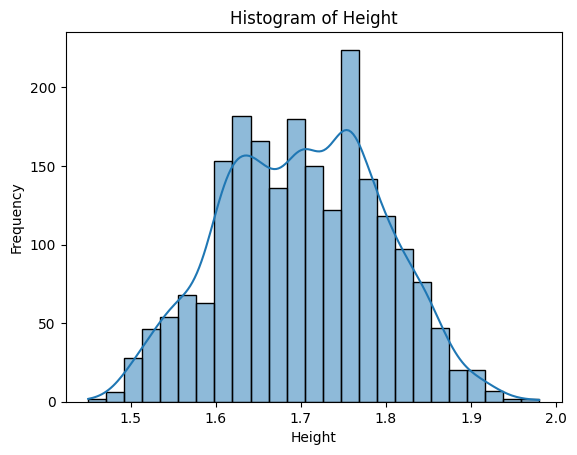

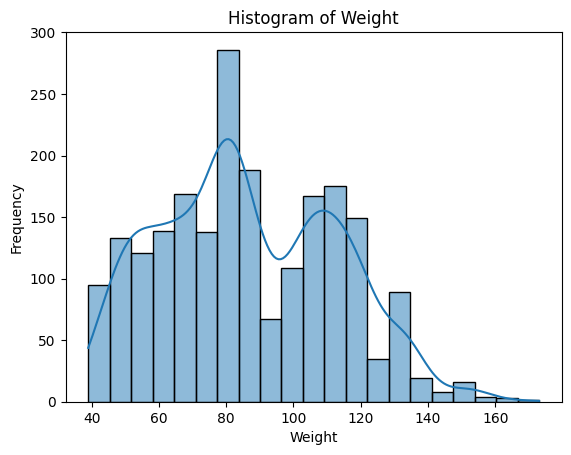

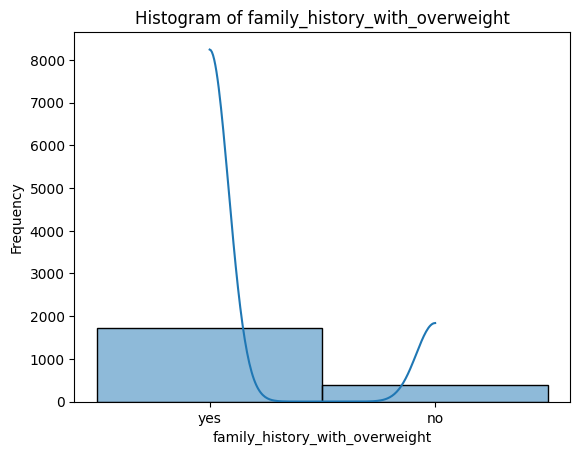

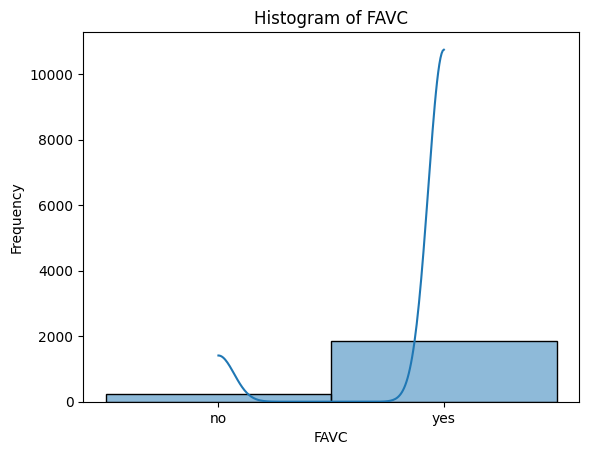

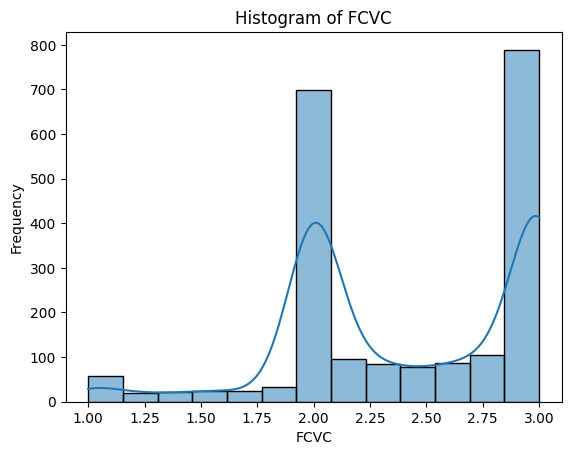

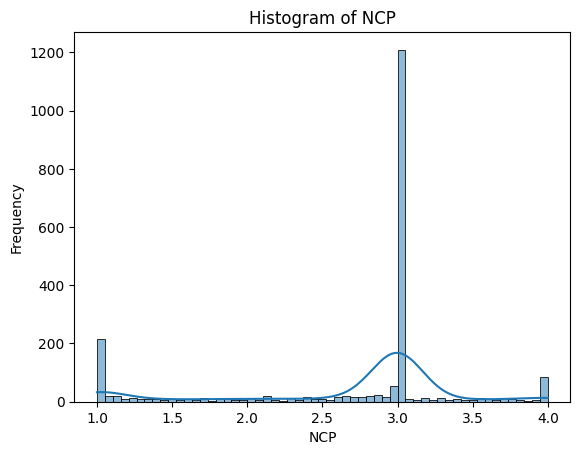

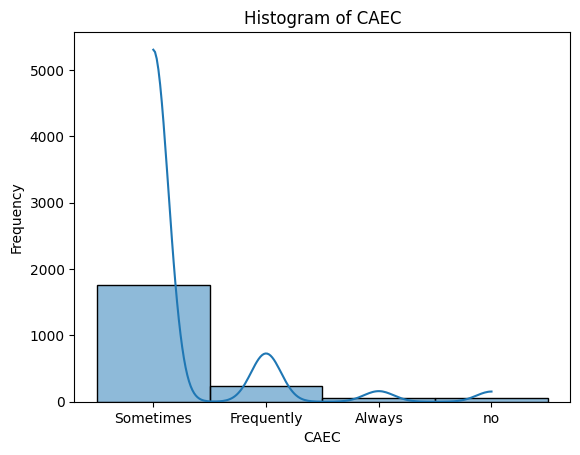

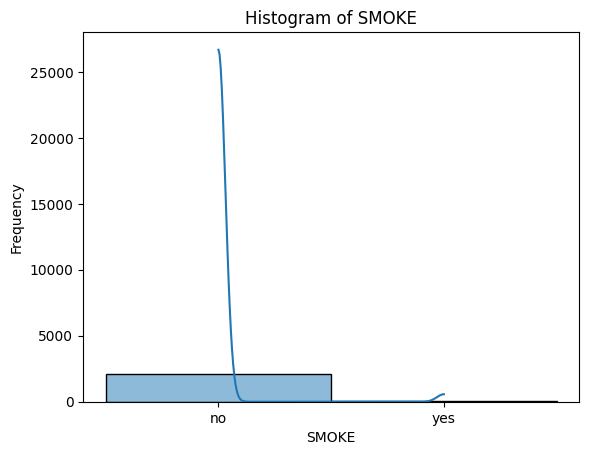

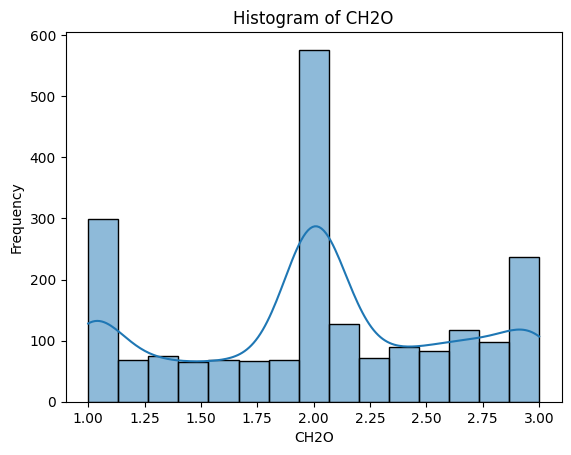

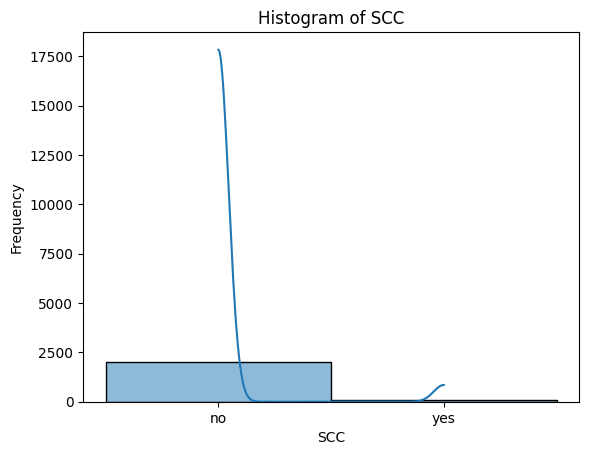

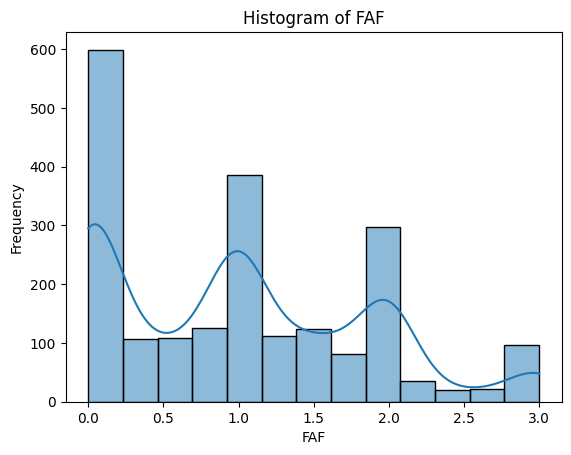

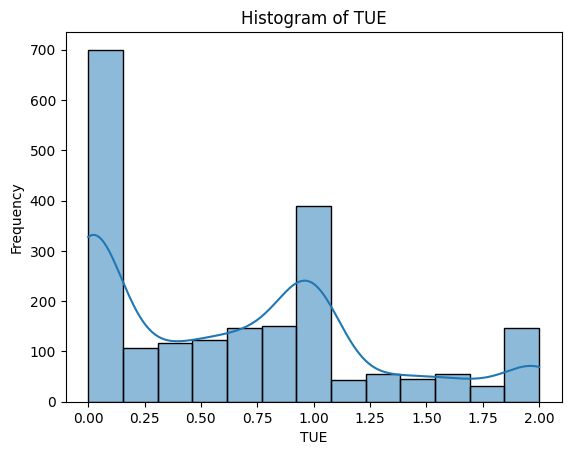

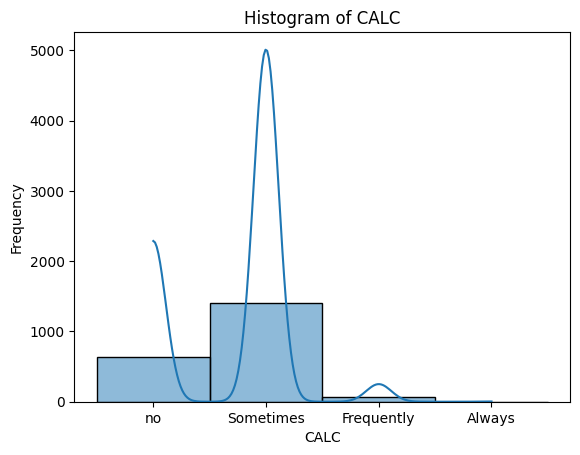

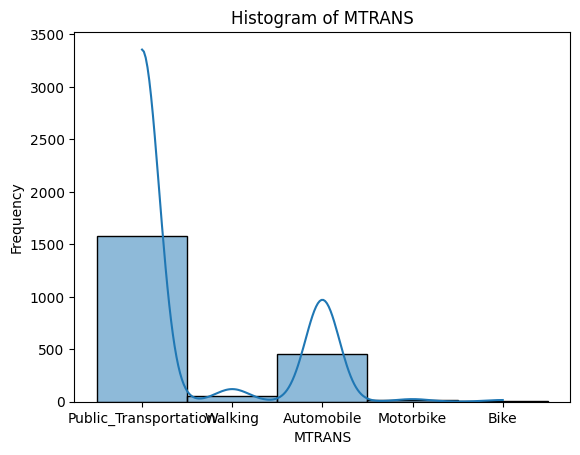

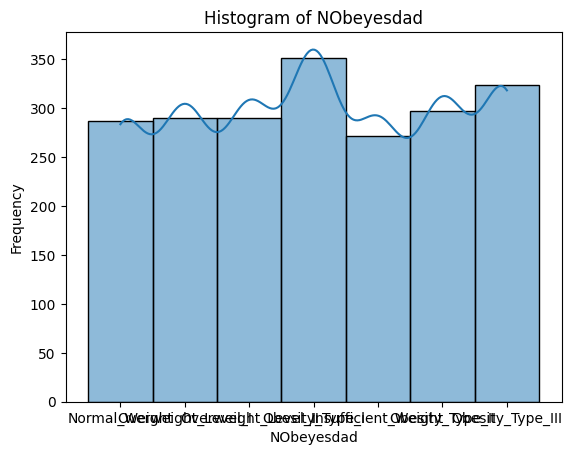

In [12]:
# Plot the histogram for each varaibles 
for col in raw_df.columns:
    plt.figure() # Build a new windows for each plot
    sns.histplot(data = raw_df, x=f"{col}", kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'Histogram of {col}')  

    plt.show()


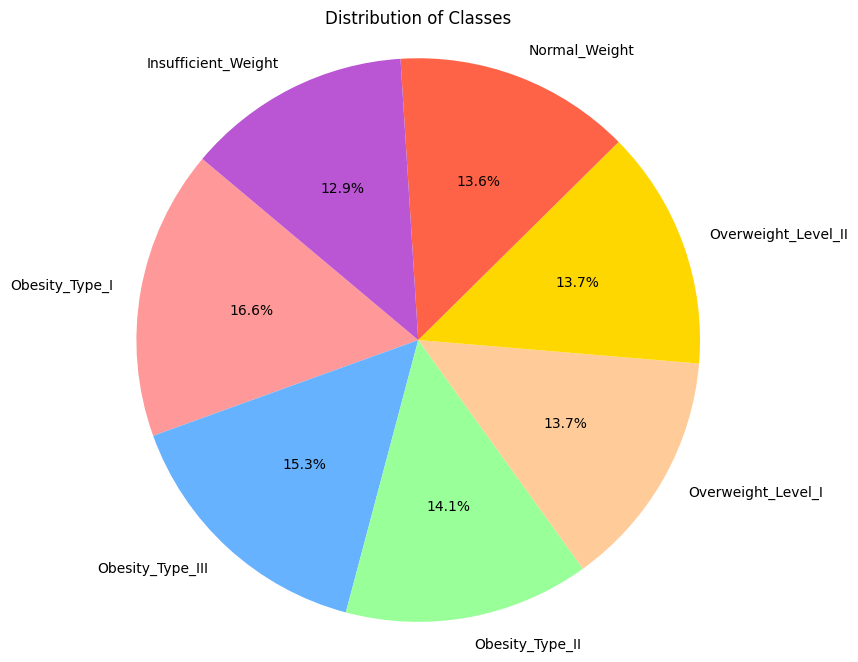

In [13]:
# plot for analysis 
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#BA55D3']
class_counts = raw_df['NObeyesdad'].value_counts()
# Plot
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Part B


In [14]:
# Used to import libraries and packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [15]:
# Check data info 
raw_df.info()

# Check null value 
raw_df.isnull().sum()

# Creat the copy of raw dataframe for binary classification target
copy_raw_df = raw_df.copy()
copy_raw_df.head()
# Get the unique target types 
copy_raw_df['NObeyesdad'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [16]:
# # Encoding 
# onehot = pd.get_dummies(copy_raw_df['NObeyesdad'])
# # Join the onehot matrix back to the copy one --> actually, here we create a new dataframe (so we need to assign to a variable)
# copy_raw_df = copy_raw_df.join(onehot)
# # Axis  = 1 means concat horizontally, if Axis = 0 means veritically concat
# copy_raw_df = copy_raw_df.drop('NObeyesdad', axis= 1)
# copy_raw_df.head()

In [17]:
"""
Then, we have to classify the current targets:
Normalweight sign:
1. Insufficient_Weight
2. Normal_Weight
Overweight sign: 
1. Overweight_Level_I
2. Overweight_Level_II
3. Obesity_Type_I
4. Obesity_Type_II
5. Obesity_Type_III
"""
overweight_list = ['Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
# Using the apply function with the lambda function
copy_raw_df['overweight'] = copy_raw_df['NObeyesdad'].apply([lambda x: 1 if x in overweight_list else 0])
copy_raw_df = copy_raw_df.drop('NObeyesdad', axis= 1)
copy_raw_df.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,overweight
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1


In [18]:
"""
Using the one hot encoding to process the Gender, family_history_with_overweight, FAVC, SMOKE,CAEC,SCC
"""
cols_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Encode other catergorical data
copy_raw_df = pd.get_dummies(copy_raw_df, columns=cols_to_encode, drop_first=True)
# Get the encoded table
copy_raw_df.head()
tmp_copy = copy_raw_df.copy()

In [19]:
# Seperate the Training Set and Test Set
# 80% training set 20% test set
predict_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
        'Gender_Male', 'family_history_with_overweight_yes',
       'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes',
       'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']

X_train, X_test, y_train, y_test = train_test_split(copy_raw_df[predict_columns], copy_raw_df['overweight'], test_size=0.2, random_state=42)


In [20]:
# Standardization or normalization 
# Skip the one hot columns, only foucs on the numerical data
numeric_cols = copy_raw_df.select_dtypes(include=['float64']).columns

# Some models may prefer the normalized data
# Build standard scaler on train only
std = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_std[numeric_cols] = std.fit_transform(X_train[numeric_cols])   
X_test_std[numeric_cols] = std.transform(X_test[numeric_cols])         

"""
If this model based on distance and gradient, we should select the standardization, others, we could use the normalization
"""

'\nIf this model based on distance and gradient, we should select the standardization, others, we could use the normalization\n'

## Build Model
#### Question 1 for KNN

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameter for KNN model {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.9230 

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       118
           1       0.92      0.99      0.95       305

    accuracy                           0.93       423
   macro avg       0.94      0.88      0.91       423
weighted avg       0.93      0.93      0.93       423

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004846      0.001213         0.323270        0.023156   
1        0.003719      0.001261         0.313965        0.007718   
2        0.004134      0.001216         0.331816        0.012962   
3        0.004726      0.000894         0.280621        0.049913   
4        0.005197      0.000995         0.323613        0.022386   
5        0.004905      0.001382         0.320884        0.005171   
6        0.003301      

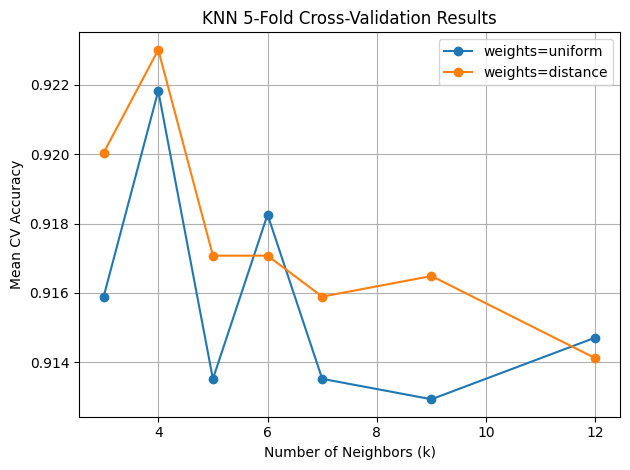

In [21]:
# List the parameter for the KNN model
knn_parameter = {
    'n_neighbors':[3, 4, 5, 6, 7, 9, 12],
    'weights': ['uniform', 'distance'] 
}
"""
    'uniform' -> uniform weights. All points in each neighborhood are weighted equally.
    'distance'-> weight points by the inverse of their distance. in this case, closer neighbors of a 
                 query point will have a greater influence than neighbors which are further away. 
"""
# Called knn model
knn = KNeighborsClassifier()
# Tried to find the hyperparameter
# Cross validation = 5
knn_1_grid = GridSearchCV(knn, param_grid= knn_parameter, n_jobs= -1, cv= 5, verbose= 1)
knn_1_grid.fit(X_train_std, y_train)
print(f"The best parameter for KNN model {knn_1_grid.best_params_}")
print(f"Best cross-validation score: {knn_1_grid.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_KNN_Q1 = knn_1_grid.predict(X_test_std)

# Get the report of the classification result
print(classification_report(y_test, y_pred_KNN_Q1))

# Get the cross validation result
KNN_Q1_result = pd.DataFrame(knn_1_grid.cv_results_)
print( KNN_Q1_result)
# Get the parameter and the scores
for weight in ['uniform', 'distance']:
    # Extract the different weight conditions
    subset = KNN_Q1_result[KNN_Q1_result['param_weights'] == weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=f'weights={weight}')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN 5-Fold Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_cv_plot_Q1.png')  
plt.show()

#### Question 1 for ANN

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameter for ANN model {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best cross-validation score: 0.9911 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       1.00      1.00      1.00       305

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.676404      0.208449         0.004622        0.003307   
1       1.206671      0.152828         0.003859        0.000992   
2       1.334449      0.185401         0.004027        0.000552   
3       2.303489      0.270878         0.002943        0.001091   
4       1.854112      0.298702         0.005186        0.002213   
5       2.449235 

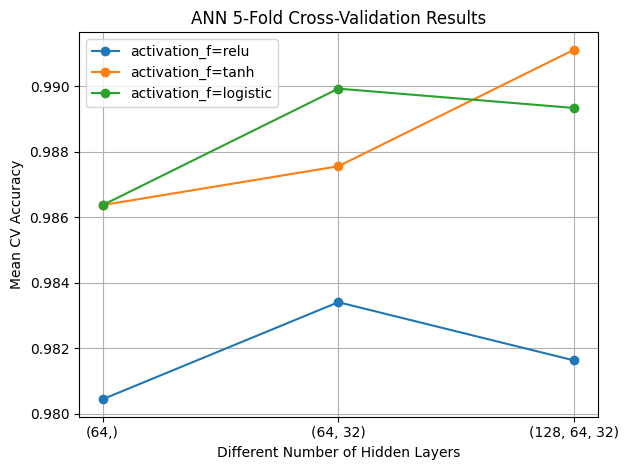

In [22]:
# Import the ANN package
from sklearn.neural_network import MLPClassifier

# List the parameter for the SVM model
ANN_q1_param = {
    'hidden_layer_sizes': [(64,), (64, 32),(128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.001],
    'learning_rate_init': [0.001],
    'solver': ['adam']
}
# Build the model
ann_mlp = MLPClassifier(max_iter= 500, random_state= 42)
# Tried to find the best parameter
ann_q1_best = GridSearchCV(ann_mlp, ANN_q1_param,verbose= 1, n_jobs= -1, cv = 5)
# Fit the train set
ann_q1_best.fit(X_train_std, y_train)

# Print the result of the best parameter
print(f"The best parameter for ANN model {ann_q1_best.best_params_}")
print(f"Best cross-validation score: {ann_q1_best.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_ANN_Q1 = ann_q1_best.predict(X_test_std)

# Get the report of the classification result
print(classification_report(y_test, y_pred_ANN_Q1))

# plot the result based on different hyperparameter
ANN_Q1_result = pd.DataFrame(ann_q1_best.cv_results_)
print(ANN_Q1_result)



# Get the parameter and the scores
for activation_f in ['relu', 'tanh', 'logistic']:
    # Extract the different weight conditions
    subset = ANN_Q1_result[ANN_Q1_result['param_activation'] == activation_f]
    plt.plot(subset['param_hidden_layer_sizes'].apply(lambda x: str(x)), subset['mean_test_score'], marker='o', label=f'activation_f={activation_f}')

plt.xlabel('Different Number of Hidden Layers')
plt.ylabel('Mean CV Accuracy')
plt.title('ANN 5-Fold Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ann_cv_plot_Q1.png')  
plt.show()

## Part C

In [23]:
# Question Q1
# How many features we have right now?
print(len(copy_raw_df.columns) - 1 )

# Generate the csv file for the training set and validation set
train_df  = X_train.copy()
train_df['Overweight'] = y_train

test_df = X_test.copy()
test_df['Overweight'] = y_test

train_df.to_csv('TrainingSet.csv', index = False)
test_df.to_csv('TestSet.csv', index = False)

23


## Q2.4 Validate the training model 


In [24]:
from datetime import datetime as dt

# KNN model for q1
knn = KNeighborsClassifier(n_neighbors= 4, weights= 'distance')
start_knn_q1 = dt.now()
knn.fit(X_train_std, y_train)
running_time_knnq1 = (dt.now() - start_knn_q1).total_seconds()
start_knn_q1_test = dt.now()
y_predict_Knn = knn.predict(X_test_std)
running_time_knnq1_test = (dt.now() - start_knn_q1_test).total_seconds()

# Get the report of the classification result
print(classification_report(y_test, y_predict_Knn))
print(f"Training time: {running_time_knnq1:.6f} seconds\n\n")
print(f"Test time: {running_time_knnq1_test:.6f} seconds\n\n")

# ANN model for q1
ANN = MLPClassifier(
    hidden_layer_sizes= (128, 64, 32),
    activation = 'tanh',
    solver= 'adam',
    alpha= 0.001,
    learning_rate_init= 0.001,
    random_state= 42,
    max_iter= 500
)
start_ann_q1 = dt.now()
ANN.fit(X_train_std, y_train)
running_time_annq1 = (dt.now() - start_ann_q1).total_seconds()
start_ann_q1_test = dt.now()
y_predict_ann = ANN.predict(X_test_std)
running_time_annq1_test = (dt.now() - start_ann_q1_test).total_seconds()

# Get the report of the classification result
print(classification_report(y_test, y_predict_ann))
print(f"Training time: {running_time_annq1:.6f} seconds\n\n")
print(f"Test time: {running_time_annq1_test:.6f} seconds\n\n")





              precision    recall  f1-score   support

           0       0.97      0.77      0.86       118
           1       0.92      0.99      0.95       305

    accuracy                           0.93       423
   macro avg       0.94      0.88      0.91       423
weighted avg       0.93      0.93      0.93       423

Training time: 0.001014 seconds


Test time: 0.024545 seconds


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       1.00      1.00      1.00       305

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

Training time: 0.960173 seconds


Test time: 0.000985 seconds




### Question 2.5 (reduce the dimentionality of the table)

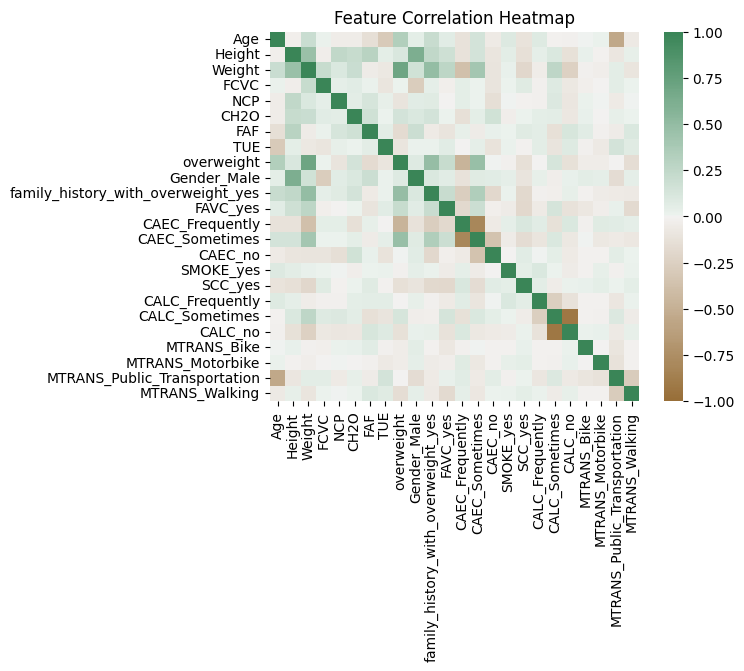

In [25]:
# Use the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation_obesity = tmp_copy.corr()

axis_corr = sns.heatmap(correlation_obesity,
 vmin= -1 , vmax= 1, center= 0, cmap=sns.diverging_palette(50, 500, n=500),
square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [48]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

# Use the mutual_info_classif to find the top 12 features
rd_X= tmp_copy.copy().drop(columns='overweight')
rd_y = tmp_copy['overweight'].copy()

selector_q1 = SelectPercentile(score_func= mutual_info_classif, percentile= 50)
# Get the feature need to be kept
selected_X_q1 = selector_q1.fit_transform(rd_X, rd_y)
# Keep the feauture name
# Get support will return a bool array which means whether this column is kept
selected_X_q1_colname = rd_X.columns[selector_q1.get_support()]
print("Selected Features:\n", list(selected_X_q1_colname))


    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Male  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0        False   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0        False   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0         True   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0         True   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0         True   

   family_history_with_overweight_yes  ...  CAEC_no  SMOKE_yes  SCC_yes  \
0                                True  ...    False      False    False   
1                                True  ...    False       True     True   
2                                True  ...    False      False    False   
3                               False  ...    False      False    False   
4                               False  ...    False      False    False   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0            False           False     True        False            

### Plot the feature selection process

C:\Users\judyw\AppData\Local\Temp\ipykernel_20504\3999554269.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")


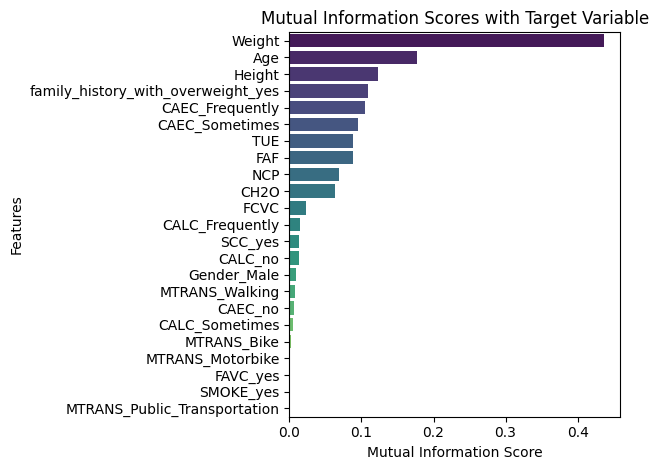

In [54]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mi_scores = mutual_info_classif(rd_X, rd_y, discrete_features='auto', random_state=42)
# Add name with each column
mi_series  = pd.Series(mi_scores, index= rd_X.columns)
# Sort the result from high value
mi_series  = mi_series.sort_values(ascending= False)

sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("Mutual Information Scores with Target Variable")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [27]:
# Generate the csv file for the training set and validation set reduce dimentionality version

updated_rd_Q1_list = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes']
X_train, X_test, y_train, y_test = train_test_split(tmp_copy[updated_rd_Q1_list], tmp_copy['overweight'], test_size=0.2, random_state=42)
print(X_train.head())

numeric_cols = X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_std[numeric_cols] = scaler.transform(X_test[numeric_cols])

train_df = X_train_std.copy()
train_df['Overweight'] = y_train

test_df = X_test_std.copy()
test_df['Overweight'] = y_test

train_df.to_csv('TrainingSetQ1_reduced.csv', index=False)
test_df.to_csv('TestSetQ1_reduced.csv', index=False)

            Age    Height      Weight       NCP      CH2O       FAF       TUE  \
162   21.000000  1.630000   60.000000  3.000000  2.000000  2.000000  0.000000   
2001  20.924956  1.752531  133.618706  3.000000  2.887659  1.480919  0.779641   
1435  22.899740  1.661715   82.595793  1.355354  2.765593  0.128342  1.659476   
649   21.837996  1.588046   44.236067  1.696080  2.550307  1.098862  0.000000   
1280  25.994746  1.811602  106.042142  3.000000  2.858171  1.813318  0.680215   

      family_history_with_overweight_yes  FAVC_yes  CAEC_Frequently  \
162                                 True      True            False   
2001                                True      True            False   
1435                                True      True            False   
649                                False     False             True   
1280                                True      True            False   

      CAEC_Sometimes  
162            False  
2001            True  
1435            T

In [28]:
# read the new csv file
train_q1_rd = pd.read_csv("TrainingSetQ1_reduced.csv")
y_train_rd = train_q1_rd['Overweight']
train_q1_rd = train_q1_rd.drop(columns='Overweight')
test_q1_rd = pd.read_csv("TestSetQ1_reduced.csv")
y_test_rd = test_q1_rd['Overweight']
test_q1_rd = test_q1_rd.drop(columns='Overweight')


In [29]:
# Standardization or normalization 
# Skip the one hot columns, only foucs on the numerical data
numeric_cols = train_q1_rd.select_dtypes(include=['float64']).columns
print(numeric_cols)

# Some models may prefer the normalized data
# Build standard scaler on train only
std = StandardScaler()
X_train_std_rd = train_q1_rd.copy()
X_test_std_rd = test_q1_rd.copy()
X_train_std_rd[numeric_cols] = std.fit_transform(train_q1_rd[numeric_cols])   
X_test_std_rd[numeric_cols] = std.transform(test_q1_rd[numeric_cols])  


print(len(X_train_std_rd), len(y_train_rd))  
print(X_train_std_rd.index.equals(y_train_rd.index))  



Index(['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
1688 1688
True


Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameter for KNN model {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9295 

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       118
           1       0.93      0.98      0.95       305

    accuracy                           0.93       423
   macro avg       0.93      0.90      0.91       423
weighted avg       0.93      0.93      0.93       423

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002583      0.000530         0.012200        0.002194   
1        0.002981      0.000984         0.004662        0.001860   
2        0.004520      0.000742         0.022039        0.006937   
3        0.004053      0.001223         0.007172        0.001519   
4        0.003893      0.000519         0.018974        0.005615   
5        0.005795      0.000583         0.008439        0.001823   
6        0.005122      

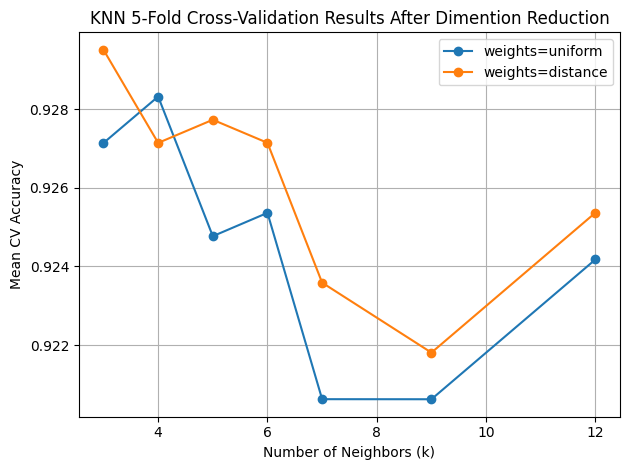

In [30]:
# List the parameter for the KNN model
knn_parameter = {
    'n_neighbors':[3, 4, 5, 6, 7, 9, 12],
    'weights': ['uniform', 'distance'] 
}
"""
    'uniform' -> uniform weights. All points in each neighborhood are weighted equally.
    'distance'-> weight points by the inverse of their distance. in this case, closer neighbors of a 
                 query point will have a greater influence than neighbors which are further away. 
"""
# Called knn model
knn = KNeighborsClassifier()
# Tried to find the hyperparameter
# Cross validation = 5
knn_1_grid = GridSearchCV(knn, param_grid= knn_parameter, n_jobs= -1, cv= 5, verbose= 1)
knn_1_grid.fit(X_train_std_rd, y_train_rd)
print(f"The best parameter for KNN model {knn_1_grid.best_params_}")
print(f"Best cross-validation score: {knn_1_grid.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_KNN_Q1_rd = knn_1_grid.predict(X_test_std_rd)

# Get the report of the classification result
print(classification_report(y_test_rd, y_pred_KNN_Q1_rd))

# Get the cross validation result
KNN_Q1_result = pd.DataFrame(knn_1_grid.cv_results_)
print( KNN_Q1_result)
# Get the parameter and the scores
for weight in ['uniform', 'distance']:
    # Extract the different weight conditions
    subset = KNN_Q1_result[KNN_Q1_result['param_weights'] == weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=f'weights={weight}')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN 5-Fold Cross-Validation Results After Dimention Reduction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_cv_plot_Q1_rd.png')  
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameter for ANN model {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best cross-validation score: 0.9959 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       118
           1       0.99      1.00      0.99       305

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.964226      0.158694         0.003057        0.000579   
1       1.691573      0.233453         0.006487        0.006623   
2       1.748581      0.294836         0.004578        0.001332   
3       2.836427      0.369408         0.002915        0.000971   
4       2.149149      0.565238         0.002734        0.000699   
5       2.535

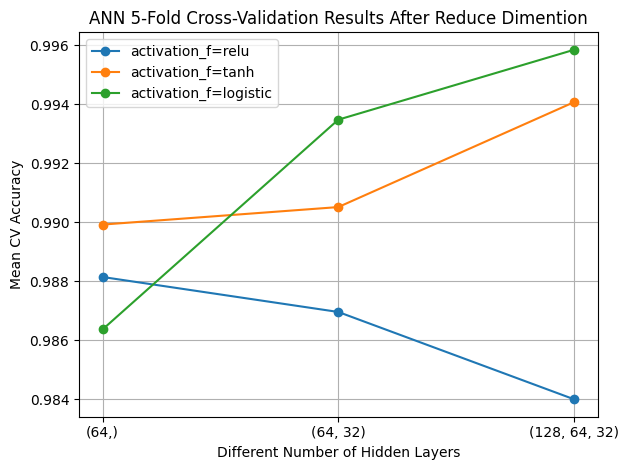

In [31]:
# Import the ANN package
from sklearn.neural_network import MLPClassifier

# List the parameter for the SVM model
ANN_q1_param = {
    'hidden_layer_sizes': [(64,), (64, 32),(128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.001],
    'learning_rate_init': [0.001],
    'solver': ['adam']
}
# Build the model
ann_mlp = MLPClassifier(max_iter= 500, random_state= 42)
# Tried to find the best parameter
ann_q1_best = GridSearchCV(ann_mlp, ANN_q1_param,verbose= 1, n_jobs= -1, cv = 5)
# Fit the train set
ann_q1_best.fit(X_train_std_rd, y_train_rd)

# Print the result of the best parameter
print(f"The best parameter for ANN model {ann_q1_best.best_params_}")
print(f"Best cross-validation score: {ann_q1_best.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_ANN_Q1 = ann_q1_best.predict(X_test_std_rd)

# Get the report of the classification result
print(classification_report(y_test_rd, y_pred_ANN_Q1))

# plot the result based on different hyperparameter
ANN_Q1_result = pd.DataFrame(ann_q1_best.cv_results_)
print(ANN_Q1_result)



# Get the parameter and the scores
for activation_f in ['relu', 'tanh', 'logistic']:
    # Extract the different weight conditions
    subset = ANN_Q1_result[ANN_Q1_result['param_activation'] == activation_f]
    plt.plot(subset['param_hidden_layer_sizes'].apply(lambda x: str(x)), subset['mean_test_score'], marker='o', label=f'activation_f={activation_f}')

plt.xlabel('Different Number of Hidden Layers')
plt.ylabel('Mean CV Accuracy')
plt.title('ANN 5-Fold Cross-Validation Results After Reduce Dimention')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ann_cv_plot_Q1_rd.png')  
plt.show()

In [32]:
from datetime import datetime as dt

# KNN model for q1
knn = KNeighborsClassifier(n_neighbors= 3, weights= 'distance')
start_knn_q1 = dt.now()
knn.fit(X_train_std_rd, y_train_rd)
running_time_knnq1 = (dt.now() - start_knn_q1).total_seconds()
start_knn_q1_test = dt.now()
y_predict_Knn = knn.predict(X_test_std_rd)
running_time_knnq1_test = (dt.now() - start_knn_q1_test).total_seconds()

# Get the report of the classification result
print(classification_report(y_test_rd, y_predict_Knn))
print(f"Training time: {running_time_knnq1:.6f} seconds\n\n")
print(f"Test time: {running_time_knnq1_test:.6f} seconds\n\n")

# ANN model for q1
ANN = MLPClassifier(
    hidden_layer_sizes= (128, 64, 32),
    activation = 'tanh',
    solver= 'adam',
    alpha= 0.001,
    learning_rate_init= 0.001,
    random_state= 42,
    max_iter= 500
)
start_ann_q1 = dt.now()
ANN.fit(X_train_std_rd, y_train_rd)
running_time_annq1 = (dt.now() - start_ann_q1).total_seconds()
start_ann_q1_test = dt.now()
y_predict_ann = ANN.predict(X_test_std_rd)
running_time_annq1_test = (dt.now() - start_ann_q1_test).total_seconds()

# Get the report of the classification result
print(classification_report(y_test_rd, y_predict_ann))
print(f"Training time: {running_time_annq1:.6f} seconds\n\n")
print(f"Test time: {running_time_annq1_test:.6f} seconds\n\n")



              precision    recall  f1-score   support

           0       0.93      0.81      0.87       118
           1       0.93      0.98      0.95       305

    accuracy                           0.93       423
   macro avg       0.93      0.90      0.91       423
weighted avg       0.93      0.93      0.93       423

Training time: 0.003421 seconds


Test time: 0.004012 seconds


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       118
           1       0.99      0.99      0.99       305

    accuracy                           0.99       423
   macro avg       0.98      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Training time: 0.876808 seconds


Test time: 0.001008 seconds




## Problem 2


In [33]:
# Creat the copy of raw dataframe for binary classification target
P2_raw_df = raw_df.copy()
overweight_list = {'Normal_Weight' : 1, 
                   'Overweight_Level_I' : 2, 
                   'Overweight_Level_II' : 3,
                   'Obesity_Type_I': 4,
                   'Insufficient_Weight': 5, 
                   'Obesity_Type_II' : 6,
                    'Obesity_Type_III':7}
# Using the apply function with the lambda function
P2_raw_df['overweight'] = P2_raw_df['NObeyesdad'].apply(lambda x: overweight_list[x])

P2_raw_df = P2_raw_df.drop('NObeyesdad', axis= 1)
P2_raw_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,overweight
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3


In [34]:
"""
Using the one hot encoding to process the Gender, family_history_with_overweight, FAVC, SMOKE,CAEC,SCC
"""
cols_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Encode other catergorical data
P2_raw_df = pd.get_dummies(P2_raw_df, columns=cols_to_encode, drop_first=True)
# Get the encoded table
P2_raw_df.head()
p2_temp_copy = P2_raw_df.copy()

In [35]:
# Seperate the Training Set and Test Set
# 80% training set 20% test set
predict_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
        'Gender_Male', 'family_history_with_overweight_yes',
       'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes',
       'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']

X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(P2_raw_df[predict_columns], P2_raw_df['overweight'], test_size=0.2, random_state=42)


In [36]:
# Standardization or normalization 
# Skip the one hot columns, only foucs on the numerical data
numeric_cols = copy_raw_df.select_dtypes(include=['float64']).columns

# Some models may prefer the normalized data
# Build standard scaler on train only
std = StandardScaler()
X_train_std_q2 = X_train_q2.copy()
X_test_std_q2 = X_test_q2.copy()
X_train_std_q2[numeric_cols] = std.fit_transform(X_train_q2[numeric_cols])   
X_test_std_q2[numeric_cols] = std.transform(X_test_q2[numeric_cols])    

### Question Problem 2 Without Dimension Reduction KNN Model


Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameter for KNN model {'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.8359 

              precision    recall  f1-score   support

           1       0.83      0.40      0.54        62
           2       0.76      0.84      0.80        56
           3       0.67      0.80      0.73        50
           4       0.88      0.92      0.90        78
           5       0.84      0.93      0.88        56
           6       0.89      0.97      0.93        58
           7       0.98      1.00      0.99        63

    accuracy                           0.84       423
   macro avg       0.84      0.84      0.82       423
weighted avg       0.84      0.84      0.83       423

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.001802      0.000509         0.017826        0.008550   
1        0.001806      0.000681         0.006943        0.002629   
2        0.004133      0.

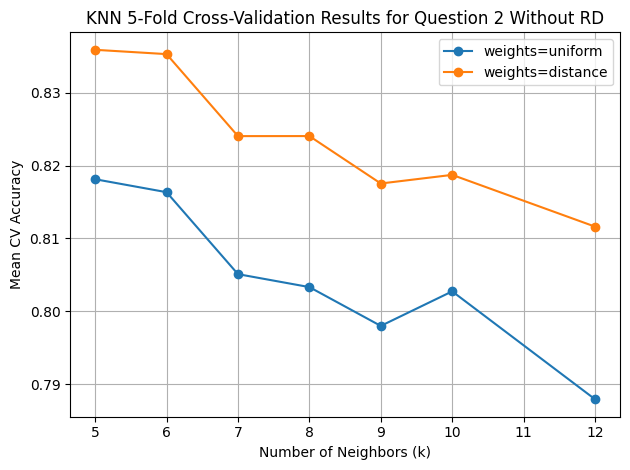

In [37]:
# List the parameter for the KNN model
knn_parameter = {
    'n_neighbors':[ 5, 6, 7, 8, 9, 10, 12],
    'weights': ['uniform', 'distance'] 
}
"""
    'uniform' -> uniform weights. All points in each neighborhood are weighted equally.
    'distance'-> weight points by the inverse of their distance. in this case, closer neighbors of a 
                 query point will have a greater influence than neighbors which are further away. 
"""
# Called knn model
knn = KNeighborsClassifier()
# Tried to find the hyperparameter
# Cross validation = 5
knn_2_grid = GridSearchCV(knn, param_grid= knn_parameter, n_jobs= -1, cv= 5, verbose= 1)
knn_2_grid.fit(X_train_std_q2, y_train_q2)
print(f"The best parameter for KNN model {knn_2_grid.best_params_}")
print(f"Best cross-validation score: {knn_2_grid.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_KNN_Q2 = knn_2_grid.predict(X_test_std_q2)

# Get the report of the classification result
print(classification_report(y_test_q2, y_pred_KNN_Q2))

# Get the cross validation result
KNN_Q2_result = pd.DataFrame(knn_2_grid.cv_results_)
print( KNN_Q2_result)
# Get the parameter and the scores
for weight in ['uniform', 'distance']:
    # Extract the different weight conditions
    subset = KNN_Q2_result[KNN_Q2_result['param_weights'] == weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=f'weights={weight}')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN 5-Fold Cross-Validation Results for Question 2 Without RD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_cv_plot_Q2.png')  
plt.show()

### Problem 2 ANN Model Without Dimension Reduction

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameter for ANN model {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best cross-validation score: 0.9722 

              precision    recall  f1-score   support

           1       0.98      0.89      0.93        62
           2       0.96      0.95      0.95        56
           3       0.96      1.00      0.98        50
           4       1.00      0.99      0.99        78
           5       0.92      1.00      0.96        56
           6       0.98      1.00      0.99        58
           7       1.00      1.00      1.00        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.709630      0.079184         0.003933        0.000624   
1       2.82497

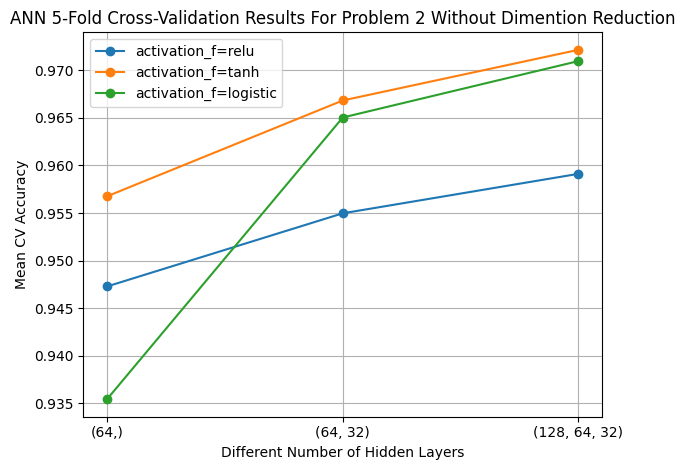

In [38]:
# Import the ANN package
from sklearn.neural_network import MLPClassifier

# List the parameter for the SVM model
ANN_q2_param = {
    'hidden_layer_sizes': [(64,), (64, 32),(128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.001],
    'learning_rate_init': [0.001],
    'solver': ['adam']
}
# Build the model
ann_mlp = MLPClassifier(max_iter= 500, random_state= 42)
# Tried to find the best parameter
ann_q2_best = GridSearchCV(ann_mlp, ANN_q2_param,verbose= 1, n_jobs= -1, cv = 5)
# Fit the train set
ann_q2_best.fit(X_train_std_q2, y_train_q2)

# Print the result of the best parameter
print(f"The best parameter for ANN model {ann_q2_best.best_params_}")
print(f"Best cross-validation score: {ann_q2_best.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_ANN_Q2 = ann_q2_best.predict(X_test_std_q2)

# Get the report of the classification result
print(classification_report(y_test_q2, y_pred_ANN_Q2))

# plot the result based on different hyperparameter
ANN_Q2_result = pd.DataFrame(ann_q2_best.cv_results_)
print(ANN_Q2_result)



# Get the parameter and the scores
for activation_f in ['relu', 'tanh', 'logistic']:
    # Extract the different weight conditions
    subset = ANN_Q2_result[ANN_Q2_result['param_activation'] == activation_f]
    plt.plot(subset['param_hidden_layer_sizes'].apply(lambda x: str(x)), subset['mean_test_score'], marker='o', label=f'activation_f={activation_f}')

plt.xlabel('Different Number of Hidden Layers')
plt.ylabel('Mean CV Accuracy')
plt.title('ANN 5-Fold Cross-Validation Results For Problem 2 Without Dimention Reduction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ann_cv_plot_Q2.png')  
plt.show()

In [39]:
# Generate the csv file 
print(X_train_std_q2.head())
train_df_q2  = X_train_std_q2.copy()
train_df_q2['Overweight'] = y_train_q2

test_df_q2 = X_test_std_q2.copy()
test_df_q2['Overweight'] = y_test_q2

train_df_q2.to_csv('TrainingSetQ2.csv', index = False)
test_df_q2.to_csv('TestSetQ2.csv', index = False)

           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
162  -0.532646 -0.768029 -1.019413  1.076717  0.401513 -0.010142  1.186213   
2001 -0.544235  0.546078  1.802127  1.076717  0.401513  1.446428  0.567871   
1435 -0.239258 -0.427896 -0.153398 -2.268694 -1.700740  1.246128 -1.043353   
649  -0.403229 -1.217973 -1.623588  1.076717 -1.265210  0.892863  0.112755   
1280  0.238722  1.179597  0.745216  1.076717  0.401513  1.398040  0.963833   

           TUE  Gender_Male  family_history_with_overweight_yes  ...  CAEC_no  \
162  -1.069472        False                                True  ...    False   
2001  0.224537        False                                True  ...    False   
1435  1.684843        False                                True  ...    False   
649  -1.069472        False                               False  ...    False   
1280  0.059515         True                                True  ...    False   

      SMOKE_yes  SCC_yes  CALC_Frequently  C

In [40]:
from datetime import datetime as dt

# KNN model for q2
knn = KNeighborsClassifier(n_neighbors= 5, weights= 'distance')
start_knn_q2 = dt.now()
knn.fit(X_train_std_q2, y_train_q2)
running_time_knnq2 = (dt.now() - start_knn_q2).total_seconds()
start_knn_q2_test = dt.now()
y_predict_Knn_q2 = knn.predict(X_test_std_q2)
running_time_knnq2_test = (dt.now() - start_knn_q2_test).total_seconds()

# Get the report of the classification result
print(classification_report(y_test_q2, y_predict_Knn_q2))
print(f"Training time: {running_time_knnq2:.6f} seconds\n\n")
print(f"Test time: {running_time_knnq2_test:.6f} seconds\n\n")

# ANN model for q2
ANN = MLPClassifier(
    hidden_layer_sizes= (128, 64, 32),
    activation = 'tanh',
    solver= 'adam',
    alpha= 0.001,
    learning_rate_init= 0.001,
    random_state= 42,
    max_iter= 500
)
start_ann_q2 = dt.now()
ANN.fit(X_train_std_q2, y_train_q2)
running_time_annq2 = (dt.now() - start_ann_q2).total_seconds()
start_ann_q2_test = dt.now()
y_predict_ann_q2 = ANN.predict(X_test_std_q2)
running_time_annq2_test = (dt.now() - start_ann_q2_test).total_seconds()

# Get the report of the classification result
print(classification_report(y_test_q2, y_predict_ann_q2))
print(f"Training time: {running_time_annq2:.6f} seconds\n\n")
print(f"Test time: {running_time_annq2_test:.6f} seconds\n\n")


"""
'Normal_Weight' : 1, 
'Overweight_Level_I' : 2, 
'Overweight_Level_II' : 3,
'Obesity_Type_I': 4,
'Insufficient_Weight': 5, 
'Obesity_Type_II' : 6,
'Obesity_Type_III':7
"""

              precision    recall  f1-score   support

           1       0.83      0.40      0.54        62
           2       0.76      0.84      0.80        56
           3       0.67      0.80      0.73        50
           4       0.88      0.92      0.90        78
           5       0.84      0.93      0.88        56
           6       0.89      0.97      0.93        58
           7       0.98      1.00      0.99        63

    accuracy                           0.84       423
   macro avg       0.84      0.84      0.82       423
weighted avg       0.84      0.84      0.83       423

Training time: 0.001507 seconds


Test time: 0.029194 seconds


              precision    recall  f1-score   support

           1       0.98      0.89      0.93        62
           2       0.96      0.95      0.95        56
           3       0.96      1.00      0.98        50
           4       1.00      0.99      0.99        78
           5       0.92      1.00      0.96        56
           6  

"\n'Normal_Weight' : 1, \n'Overweight_Level_I' : 2, \n'Overweight_Level_II' : 3,\n'Obesity_Type_I': 4,\n'Insufficient_Weight': 5, \n'Obesity_Type_II' : 6,\n'Obesity_Type_III':7\n"

### Problem 2 Dimension Reduction Version

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  overweight  Gender_Male  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           1        False   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           1        False   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0           1         True   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0           2         True   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0           3         True   

   ...  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  \
0  ...    False      False    False            False           False     True   
1  ...    False       True     True            False            True    False   
2  ...    False      False    False             True           False    False   
3  ...    False      False    False             True           False    False   
4  ...    False      False    False            False            True    False   

   MTRANS_Bike  MTRANS_Motorbike  MTRA

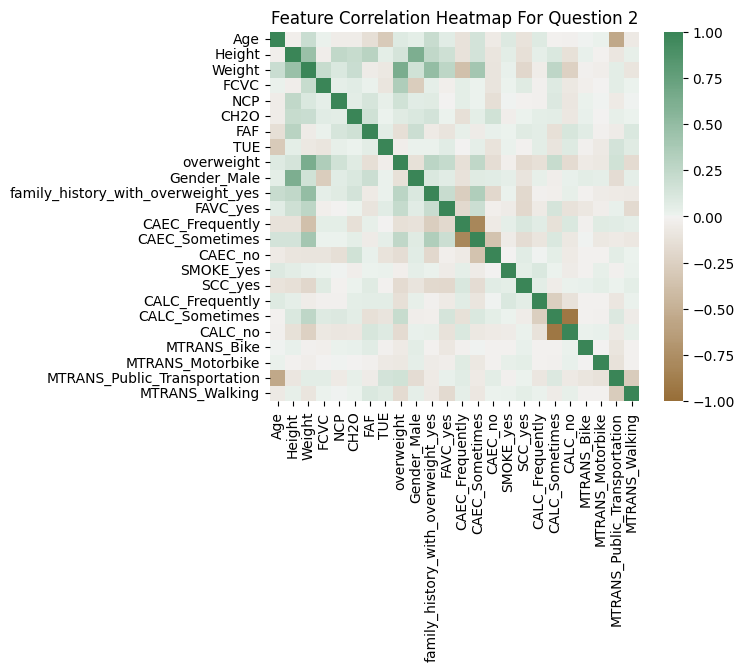

In [41]:
# Use the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(p2_temp_copy.head())
correlation_obesity_q2 = p2_temp_copy.corr()

axis_corr = sns.heatmap(correlation_obesity_q2,
 vmin= -1 , vmax= 1, center= 0, cmap=sns.diverging_palette(50, 500, n=500),
square=True)
plt.title("Feature Correlation Heatmap For Question 2")
plt.show()


In [42]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

# Use the mutual_info_classif to find the top 12 features
rd_X_q2= p2_temp_copy.copy().drop(columns='overweight')
rd_y_q2 = p2_temp_copy['overweight'].copy()

selector_q2 = SelectPercentile(score_func= mutual_info_classif, percentile= 50)
# Get the feature need to be kept
selected_X_q2 = selector_q2.fit_transform(rd_X_q2, rd_y_q2)
# Keep the feauture name
# Get support will return a bool array which means whether this column is kept
selected_X_q2_colname = rd_X_q2.columns[selector_q2.get_support()]
print("Selected Features:\n", list(selected_X_q2_colname))


Selected Features:
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes']


C:\Users\judyw\AppData\Local\Temp\ipykernel_20504\1738364229.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")


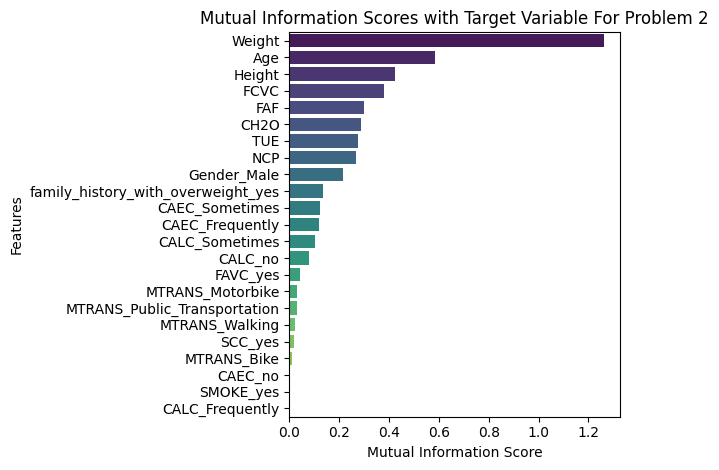

In [55]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mi_scores = mutual_info_classif(rd_X_q2, rd_y_q2, discrete_features='auto', random_state=42)
# Add name with each column
mi_series  = pd.Series(mi_scores, index= rd_X.columns)
# Sort the result from high value
mi_series  = mi_series.sort_values(ascending= False)

sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("Mutual Information Scores with Target Variable For Problem 2")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [43]:
# Generate the csv file for the training set and validation set reduce dimentionality version
updated_rd_Q2_list = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes']
X_train_q2_rd, X_test_q2_rd, y_train_q2_rd, y_test_q2_rd = train_test_split(p2_temp_copy[updated_rd_Q2_list], p2_temp_copy['overweight'], test_size=0.2, random_state=42)

# Because we use the original datasets, we need to normalize again
numeric_cols = X_train_q2_rd.select_dtypes(include=['float64']).columns
std = StandardScaler()
X_train_std_q2_rd = X_train_q2_rd.copy()
print(X_train_std_q2_rd.head())
X_test_std_q2_rd = X_test_q2_rd.copy()
X_train_std_q2_rd[numeric_cols] = std.fit_transform(X_train_std_q2_rd[numeric_cols])   
X_test_std_q2_rd[numeric_cols] = std.transform(X_test_std_q2_rd[numeric_cols])    

train_df_q2_rd  = X_train_std_q2_rd.copy()
train_df_q2_rd['Overweight'] = y_train_q2_rd

test_df_q2_rd = X_test_std_q2_rd.copy()
test_df_q2_rd['Overweight'] = y_test_q2_rd

train_df_q2_rd.to_csv('TrainingSetQ2_reduced.csv', index = False)
test_df_q2_rd.to_csv('TestSetQ2_reduced.csv', index = False)

            Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
162   21.000000  1.630000   60.000000  3.000000  3.000000  2.000000  2.000000   
2001  20.924956  1.752531  133.618706  3.000000  3.000000  2.887659  1.480919   
1435  22.899740  1.661715   82.595793  1.203754  1.355354  2.765593  0.128342   
649   21.837996  1.588046   44.236067  3.000000  1.696080  2.550307  1.098862   
1280  25.994746  1.811602  106.042142  3.000000  3.000000  2.858171  1.813318   

           TUE  Gender_Male  family_history_with_overweight_yes  \
162   0.000000        False                                True   
2001  0.779641        False                                True   
1435  1.659476        False                                True   
649   0.000000        False                               False   
1280  0.680215         True                                True   

      CAEC_Sometimes  
162            False  
2001            True  
1435            True  
649            Fal

### Problem 2 KNN Model With Dimention Reduction

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameter for KNN model {'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation score: 0.8288 

              precision    recall  f1-score   support

           1       0.86      0.39      0.53        62
           2       0.71      0.73      0.72        56
           3       0.56      0.70      0.62        50
           4       0.83      0.91      0.87        78
           5       0.84      0.95      0.89        56
           6       0.90      0.98      0.94        58
           7       1.00      1.00      1.00        63

    accuracy                           0.81       423
   macro avg       0.81      0.81      0.80       423
weighted avg       0.82      0.81      0.80       423

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002305      0.000680         0.017400        0.006890   
1        0.005017      0.002479         0.007967        0.000630   
2        0.004012      0.

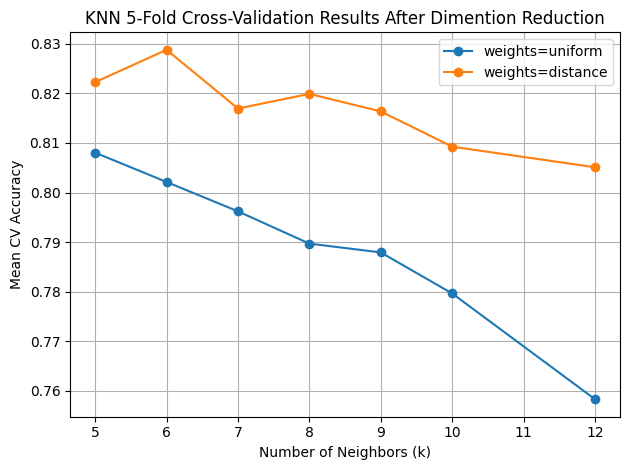

In [44]:
# List the parameter for the KNN model
knn_parameter = {
    'n_neighbors':[5, 6, 7, 8, 9, 10, 12],
    'weights': ['uniform', 'distance'] 
}
"""
    'uniform' -> uniform weights. All points in each neighborhood are weighted equally.
    'distance'-> weight points by the inverse of their distance. in this case, closer neighbors of a 
                 query point will have a greater influence than neighbors which are further away. 
"""
# Called knn model
knn = KNeighborsClassifier()
# Tried to find the hyperparameter
# Cross validation = 5
knn_2_grid_rd = GridSearchCV(knn, param_grid= knn_parameter, n_jobs= -1, cv= 5, verbose= 1)
knn_2_grid_rd.fit(X_train_std_q2_rd, y_train_q2_rd)
print(f"The best parameter for KNN model {knn_2_grid_rd.best_params_}")
print(f"Best cross-validation score: {knn_2_grid_rd.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_KNN_Q2_rd = knn_2_grid_rd.predict(X_test_std_q2_rd)

# Get the report of the classification result
print(classification_report(y_test_q2_rd, y_pred_KNN_Q2_rd))

# Get the cross validation result
KNN_Q2_result_RD = pd.DataFrame(knn_2_grid_rd.cv_results_)
print( KNN_Q2_result_RD)
# Get the parameter and the scores
for weight in ['uniform', 'distance']:
    # Extract the different weight conditions
    subset = KNN_Q2_result_RD[KNN_Q2_result_RD['param_weights'] == weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=f'weights={weight}')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN 5-Fold Cross-Validation Results After Dimention Reduction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_cv_plot_Q2_rd.png')  
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameter for ANN model {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best cross-validation score: 0.9728 

              precision    recall  f1-score   support

           1       0.98      0.87      0.92        62
           2       0.92      0.96      0.94        56
           3       0.98      0.98      0.98        50
           4       0.99      0.97      0.98        78
           5       0.93      1.00      0.97        56
           6       0.97      0.98      0.97        58
           7       1.00      1.00      1.00        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.590231      0.131178         0.005031        0.001313   
1       3.36380

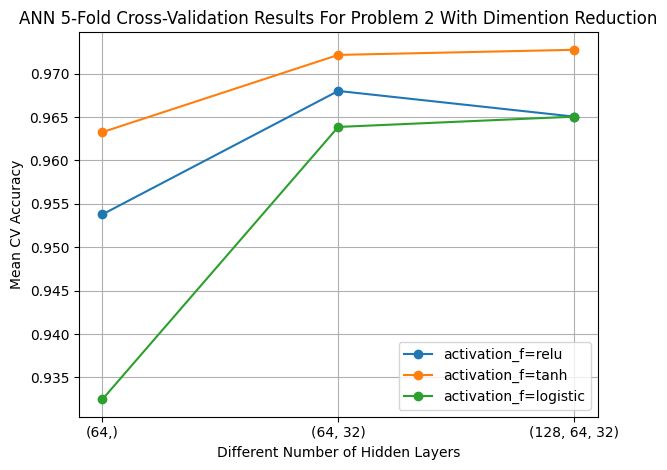

In [45]:
# Import the ANN package
from sklearn.neural_network import MLPClassifier

# List the parameter for the ANN model
ANN_q2_param = {
    'hidden_layer_sizes': [(64,), (64, 32),(128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.001],
    'learning_rate_init': [0.001],
    'solver': ['adam']
}
# Build the model
ann_mlp = MLPClassifier(max_iter= 500, random_state= 42)
# Tried to find the best parameter
ann_q2_best = GridSearchCV(ann_mlp, ANN_q2_param,verbose= 1, n_jobs= -1, cv = 5)
# Fit the train set
ann_q2_best.fit(X_train_std_q2_rd, y_train_q2_rd)

# Print the result of the best parameter
print(f"The best parameter for ANN model {ann_q2_best.best_params_}")
print(f"Best cross-validation score: {ann_q2_best.best_score_:.4f} \n")

# Apply trained model on the test set
y_pred_ANN_Q2 = ann_q2_best.predict(X_test_std_q2_rd)

# Get the report of the classification result
print(classification_report(y_test_q2_rd, y_pred_ANN_Q2))

# plot the result based on different hyperparameter
ANN_Q2_result = pd.DataFrame(ann_q2_best.cv_results_)
print(ANN_Q2_result)



# Get the parameter and the scores
for activation_f in ['relu', 'tanh', 'logistic']:
    # Extract the different weight conditions
    subset = ANN_Q2_result[ANN_Q2_result['param_activation'] == activation_f]
    plt.plot(subset['param_hidden_layer_sizes'].apply(lambda x: str(x)), subset['mean_test_score'], marker='o', label=f'activation_f={activation_f}')

plt.xlabel('Different Number of Hidden Layers')
plt.ylabel('Mean CV Accuracy')
plt.title('ANN 5-Fold Cross-Validation Results For Problem 2 With Dimention Reduction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ann_cv_plot_Q2_rd.png')  
plt.show()

### Test the Hyperparameter with model 

In [46]:
from datetime import datetime as dt

# KNN model for q2
knn = KNeighborsClassifier(n_neighbors= 6, weights= 'distance')
start_knn_q2_rd = dt.now()
knn.fit(X_train_std_q2_rd, y_train_q2_rd)
running_time_knnq2_rd = (dt.now() - start_knn_q2_rd).total_seconds()
start_knn_q2_test_rd = dt.now()
y_predict_Knn_q2_rd = knn.predict(X_test_std_q2_rd)
running_time_knnq2_test_rd = (dt.now() - start_knn_q2_test_rd).total_seconds()

# Get the report of the classification result
print(classification_report(y_test_q2_rd, y_predict_Knn_q2_rd))
print(f"Training time: {running_time_knnq2_rd:.6f} seconds\n\n")
print(f"Test time: {running_time_knnq2_test_rd:.6f} seconds\n\n")

# ANN model for q2
ANN = MLPClassifier(
    hidden_layer_sizes= (128, 64, 32),
    activation = 'tanh',
    solver= 'adam',
    alpha= 0.001,
    learning_rate_init= 0.001,
    random_state= 42,
    max_iter= 500
)
start_ann_q2_rd = dt.now()
ANN.fit(X_train_std_q2_rd, y_train_q2_rd)
running_time_annq2_rd = (dt.now() - start_ann_q2_rd).total_seconds()
start_ann_q2_test_rd = dt.now()
y_predict_ann_q2_rd = ANN.predict(X_test_std_q2_rd)
running_time_annq2_test_rd = (dt.now() - start_ann_q2_test_rd).total_seconds()

# Get the report of the classification result
print(classification_report(y_test_q2_rd, y_predict_ann_q2_rd))
print(f"Training time: {running_time_annq2_rd:.6f} seconds\n\n")
print(f"Test time: {running_time_annq2_test_rd:.6f} seconds\n\n")


"""
'Normal_Weight' : 1, 
'Overweight_Level_I' : 2, 
'Overweight_Level_II' : 3,
'Obesity_Type_I': 4,
'Insufficient_Weight': 5, 
'Obesity_Type_II' : 6,
'Obesity_Type_III':7
"""

              precision    recall  f1-score   support

           1       0.86      0.39      0.53        62
           2       0.71      0.73      0.72        56
           3       0.56      0.70      0.62        50
           4       0.83      0.91      0.87        78
           5       0.84      0.95      0.89        56
           6       0.90      0.98      0.94        58
           7       1.00      1.00      1.00        63

    accuracy                           0.81       423
   macro avg       0.81      0.81      0.80       423
weighted avg       0.82      0.81      0.80       423

Training time: 0.002999 seconds


Test time: 0.005629 seconds


              precision    recall  f1-score   support

           1       0.98      0.87      0.92        62
           2       0.92      0.96      0.94        56
           3       0.98      0.98      0.98        50
           4       0.99      0.97      0.98        78
           5       0.93      1.00      0.97        56
           6  

"\n'Normal_Weight' : 1, \n'Overweight_Level_I' : 2, \n'Overweight_Level_II' : 3,\n'Obesity_Type_I': 4,\n'Insufficient_Weight': 5, \n'Obesity_Type_II' : 6,\n'Obesity_Type_III':7\n"

In [47]:
from sklearn.inspection import permutation_importance

# 你已有的模型和测试集
knn.fit(X_train_std, y_train)
result = permutation_importance(knn, X_test_std, y_test, n_repeats=10, random_state=42)

# 输出 feature importance 排序
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_test_std.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                               Feature  Importance
2                               Weight    0.185816
0                                  Age    0.020804
3                                  NCP    0.019149
1                               Height    0.018676
6                                  TUE    0.014184
5                                  FAF    0.013712
10                      CAEC_Sometimes    0.011584
7   family_history_with_overweight_yes    0.009693
4                                 CH2O    0.006147
9                      CAEC_Frequently    0.005674
8                             FAVC_yes    0.000709
